# Empirical Orthogonal Function (EOF) Time Series Analysis using Singular Value Decomposition

## Overview

Empirical Orthogonal Function (EOF) analysis is a powerful statistical technique used in climate science, oceanography, and meteorology to identify the dominant patterns of variability in spatiotemporal datasets. EOF analysis is mathematically equivalent to Principal Component Analysis (PCA) and is implemented using Singular Value Decomposition (SVD).

## Mathematical Foundation

### The Data Matrix
Consider a spatiotemporal dataset represented as a matrix **X** of size *m* × *n*, where:
- *m* = number of spatial locations (grid points)
- *n* = number of time steps
- Each column represents the spatial pattern at a given time
- Each row represents the time series at a given location

### Singular Value Decomposition (SVD)
The EOF analysis decomposes the data matrix **X** using SVD:

$$\mathbf{X} = \mathbf{U} \boldsymbol{\Sigma} \mathbf{V}^T$$

Where:
- **U** (*m* × *m*): Left singular vectors → **Spatial EOFs** (orthogonal spatial patterns)
- **Σ** (*m* × *n*): Diagonal matrix of singular values → **Amplitudes** (strength of each mode)
- **V** (*n* × *n*): Right singular vectors → **Principal Components (PCs)** (time series coefficients)

### Physical Interpretation

1. **Spatial EOFs (U)**: Orthogonal spatial patterns that represent the dominant modes of variability
2. **Principal Components (V)**: Time series showing how each spatial pattern evolves over time
3. **Singular Values (Σ)**: Measure the amplitude/importance of each mode

### Variance Explained
The fraction of total variance explained by the *k*-th mode is:

$$\text{Variance}_k = \frac{\sigma_k^2}{\sum_{i=1}^r \sigma_i^2}$$

where *r* is the rank of the matrix and σₖ is the *k*-th singular value.

## Key Properties

1. **Orthogonality**: EOFs are spatially orthogonal, and PCs are temporally orthogonal
2. **Optimal Basis**: EOFs provide the most efficient representation of the data variance
3. **Dimensionality Reduction**: Often, the first few EOFs capture most of the variance
4. **Statistical Independence**: PCs are uncorrelated (zero covariance)

## Applications in Climate Science

- **Climate Modes**: Identifying patterns like El Niño-Southern Oscillation (ENSO), Arctic Oscillation (AO)
- **Data Compression**: Representing complex datasets with fewer variables
- **Noise Reduction**: Filtering out high-frequency noise by retaining dominant modes
- **Trend Analysis**: Separating long-term trends from variability patterns
- **Model Validation**: Comparing observed and simulated climate patterns

## Preprocessing Considerations

1. **Centering**: Remove the temporal mean at each grid point
2. **Weighting**: Apply area weighting for gridded data on spherical coordinates
3. **Normalization**: Consider standardizing by standard deviation if variables have different units
4. **Missing Data**: Handle gaps in the dataset appropriately

## Limitations

- **Linear Assumption**: EOF assumes linear relationships
- **Stationarity**: Assumes statistical properties don't change over time
- **Orthogonality Constraint**: May artificially separate physically related patterns
- **Interpretation**: EOFs are mathematical constructs and may not always have clear physical meaning

## Application Example: EOF Analysis of Precipitation Data

### Research Paper
For an example of application of EOF analysis to precipitation data, see this study:

**"Drought in the Western United States: Its Connections with Large-Scale Oceanic Oscillations"**  
*Atmosphere* 2019, 10(2), 82  
Link: [https://www.mdpi.com/2073-4433/10/2/82](https://www.mdpi.com/2073-4433/10/2/82)

This paper demonstrates how EOF analysis can be used to:
- Identify dominant spatial patterns of precipitation variability
- Extract principal modes of precipitation anomalies
- Analyze temporal evolution of precipitation patterns
- Understand regional climate dynamics

### Visualization Example

![EOF Analysis Result](atmosphere-10-00082-g001.png)

*Figure: Example of EOF analysis applied to precipitation data, showing spatial patterns and temporal components derived through singular value decomposition.*

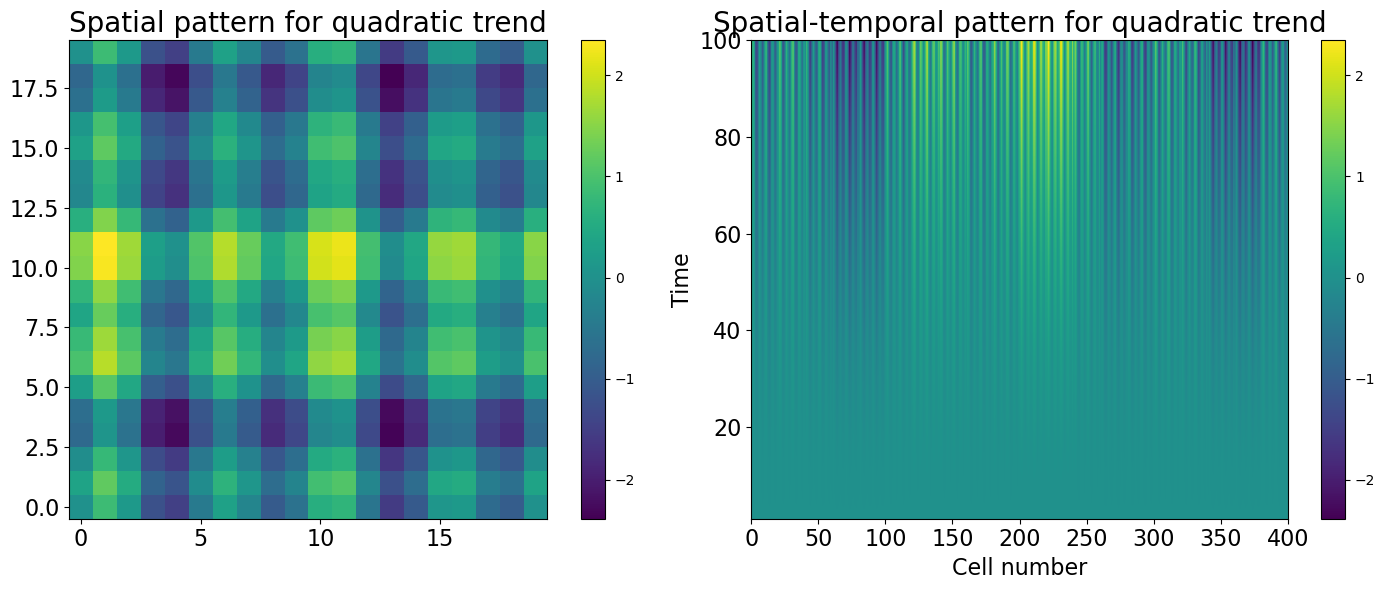

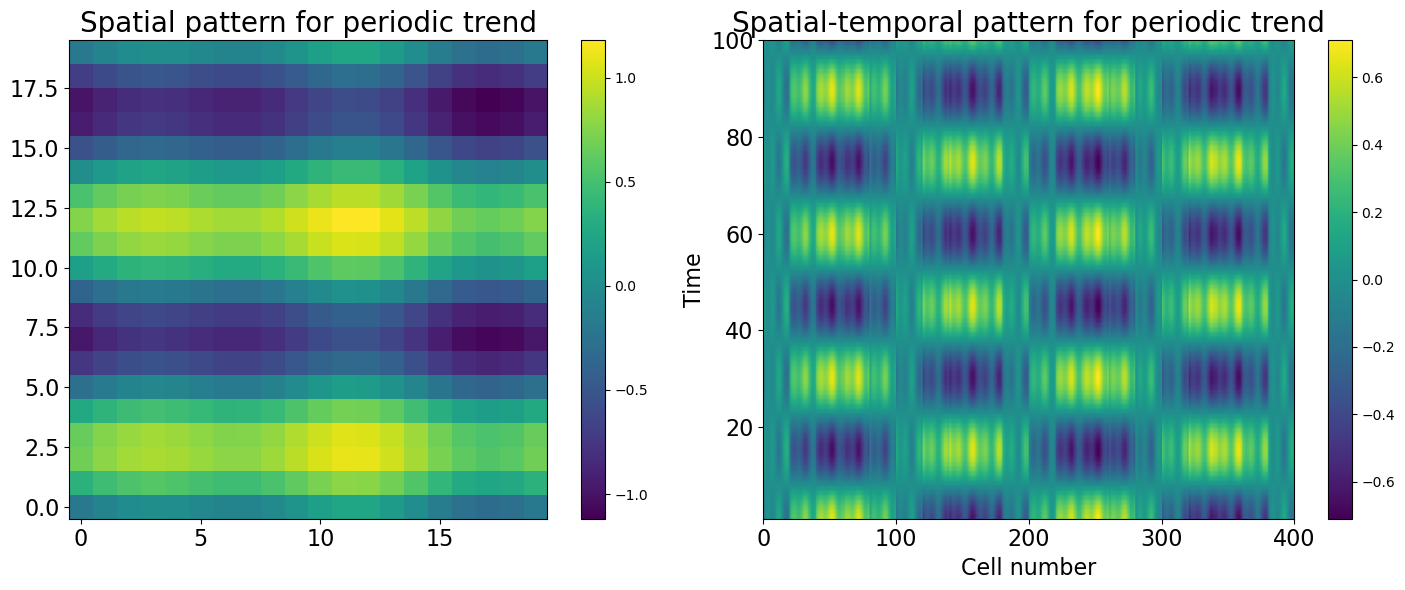

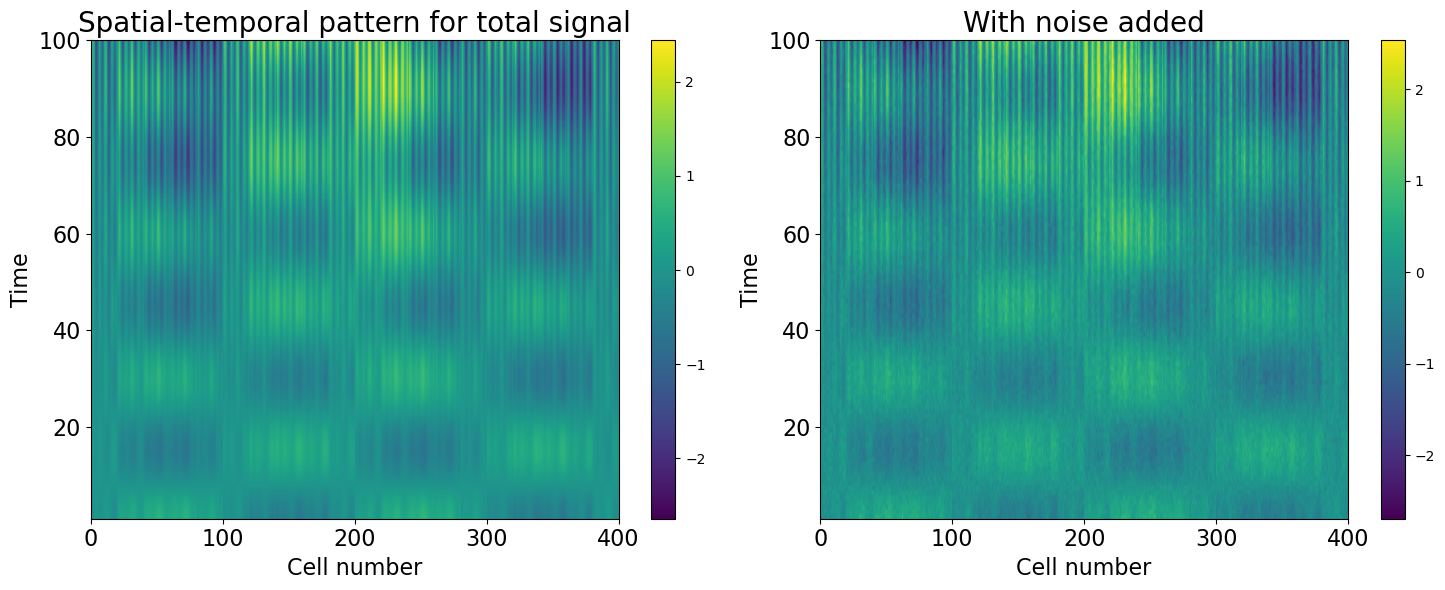

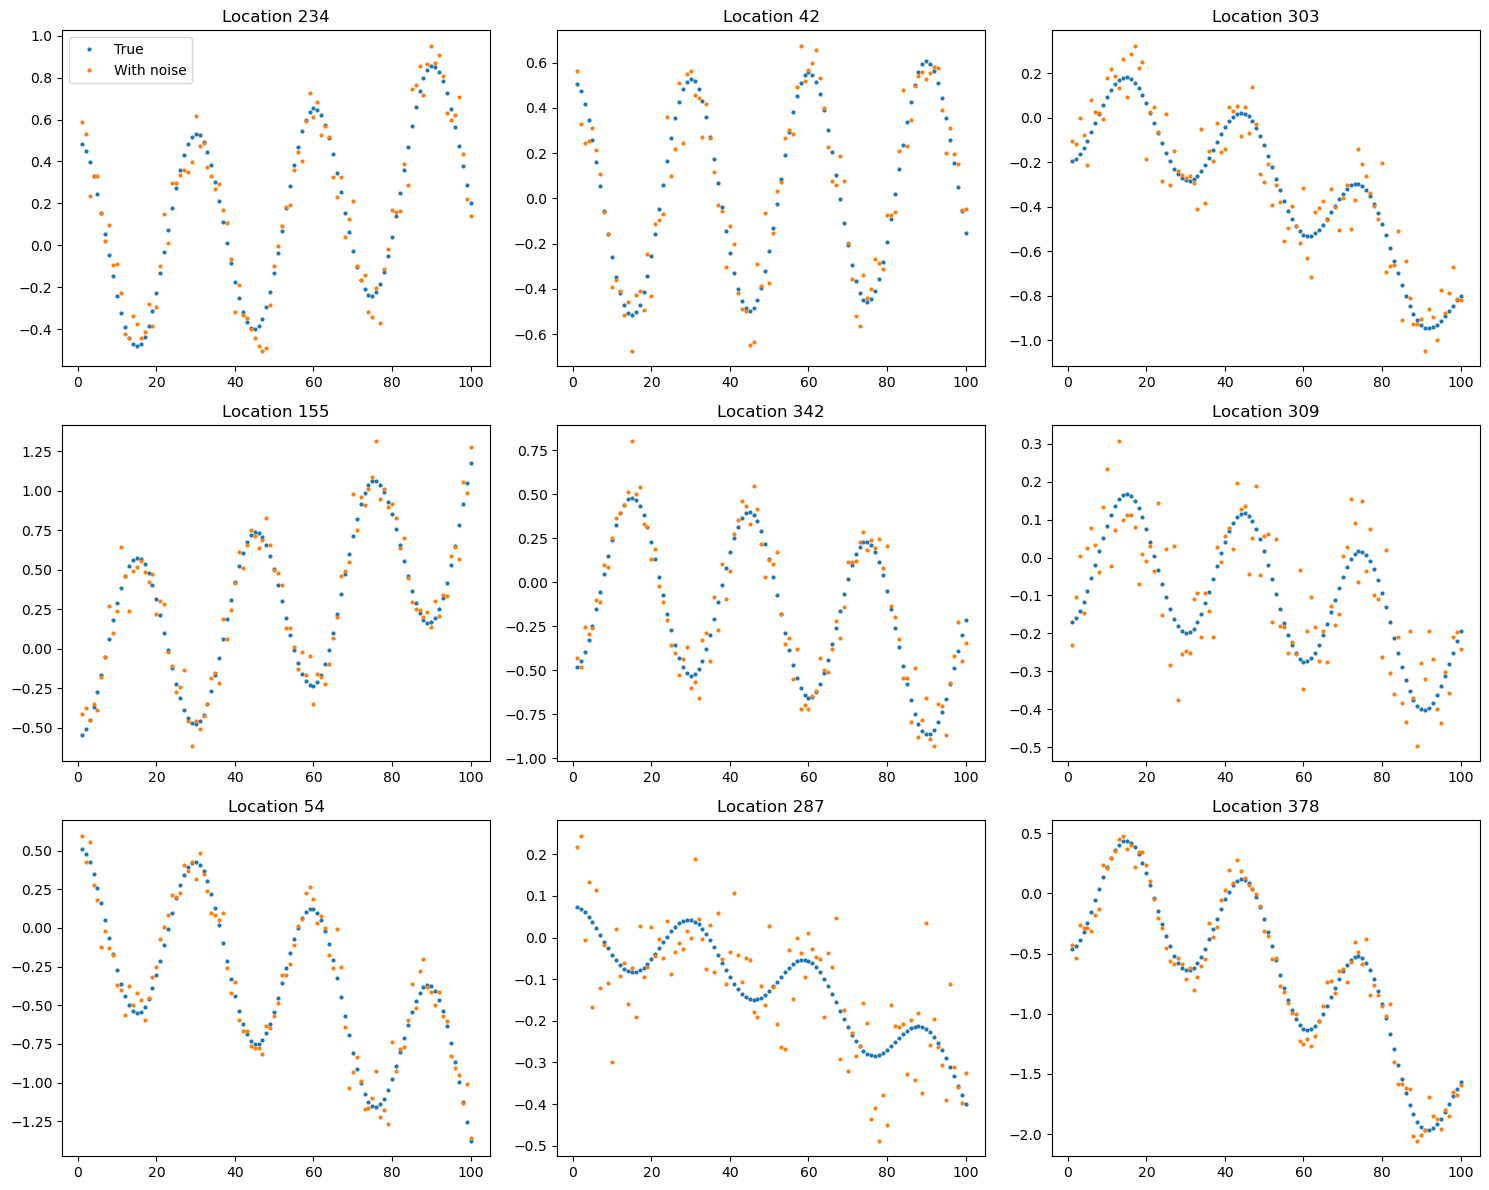

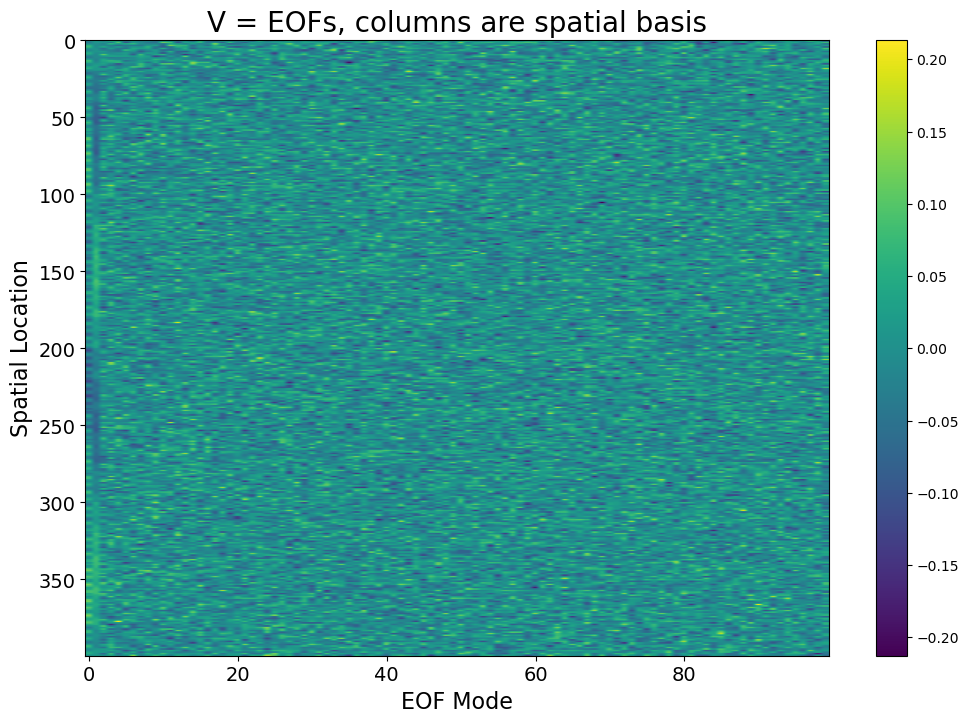

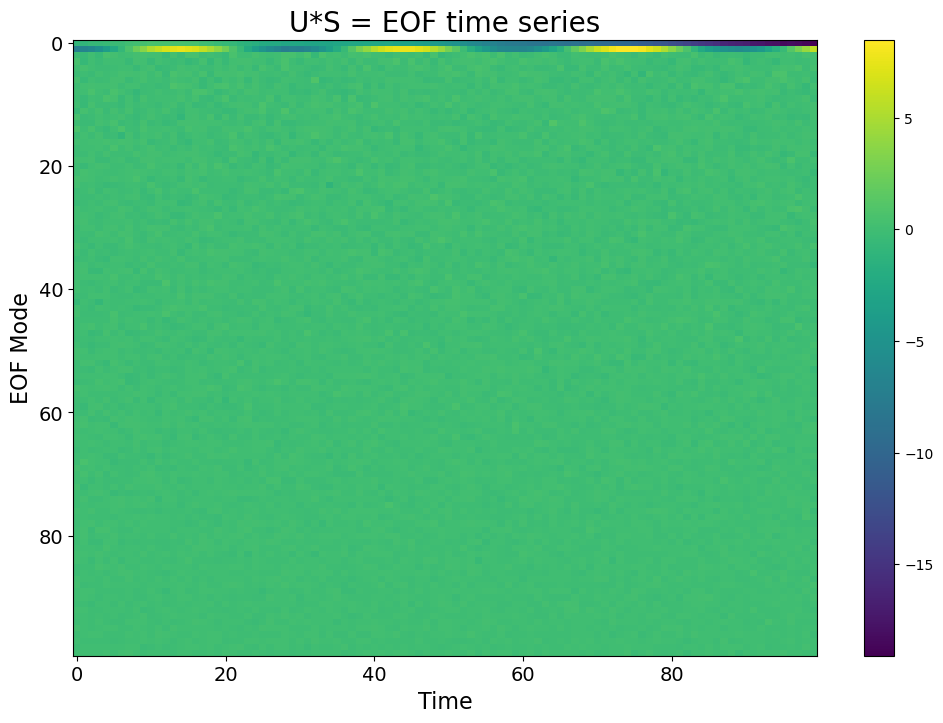

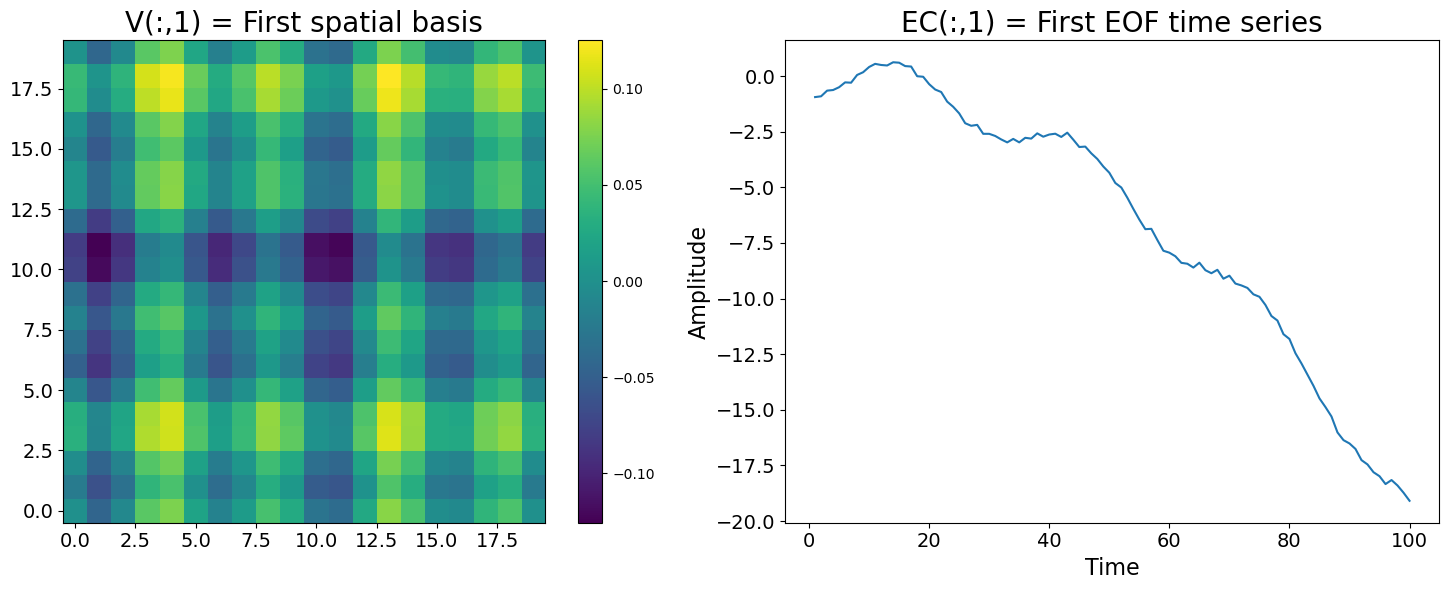

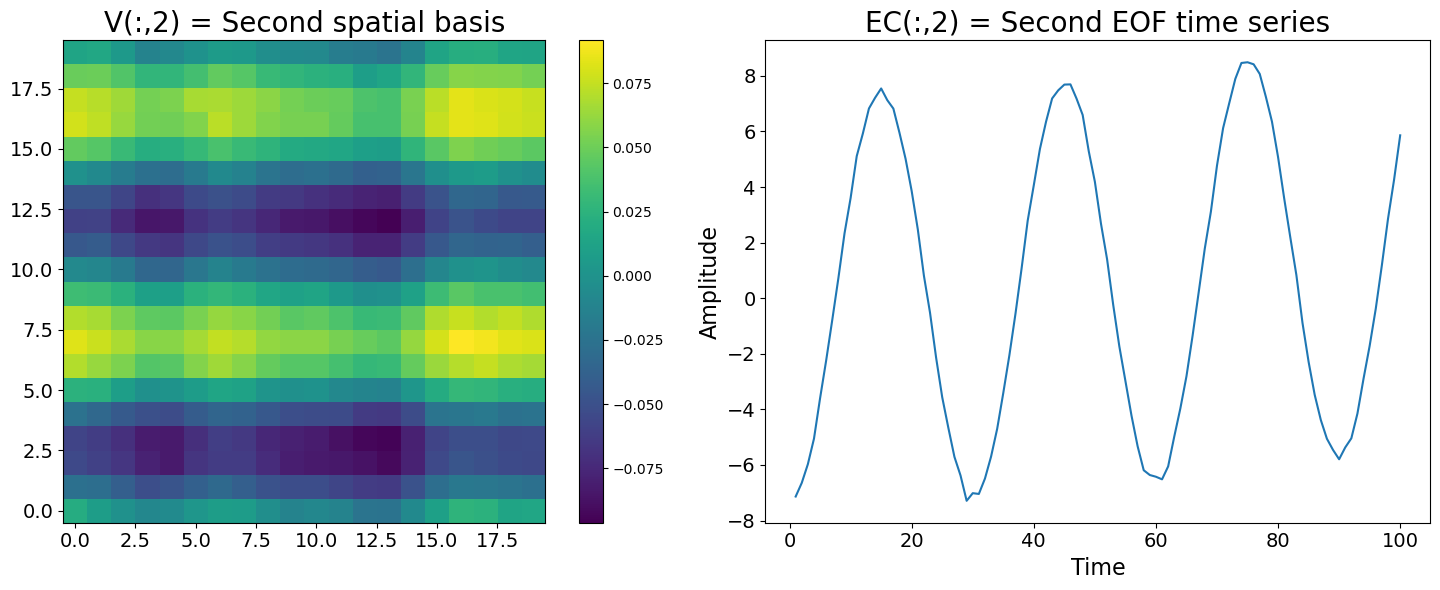

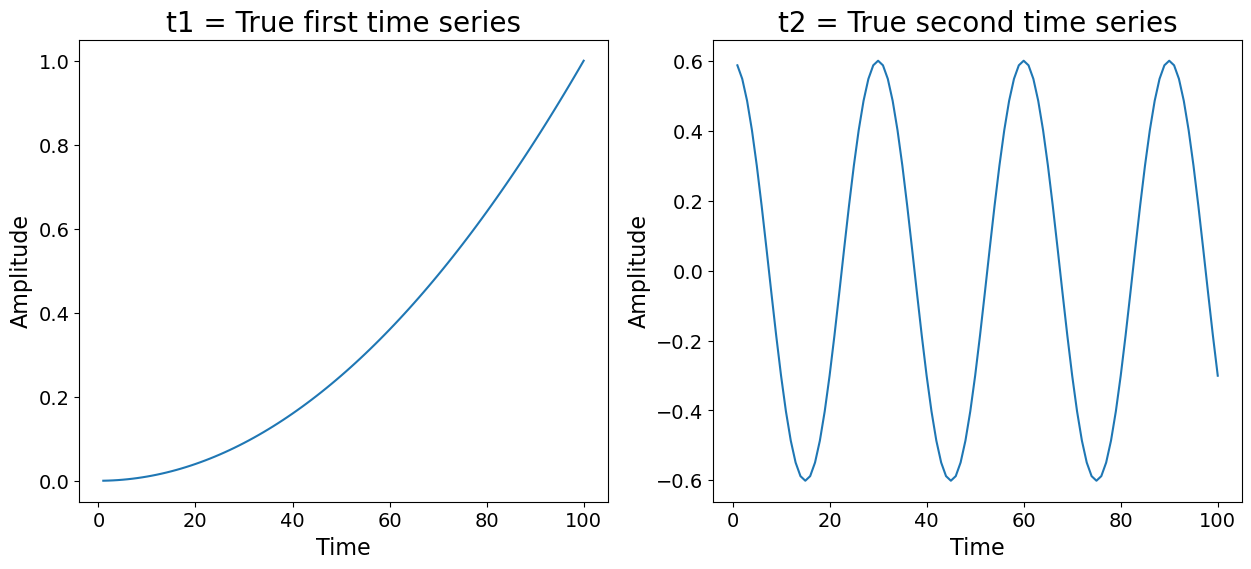

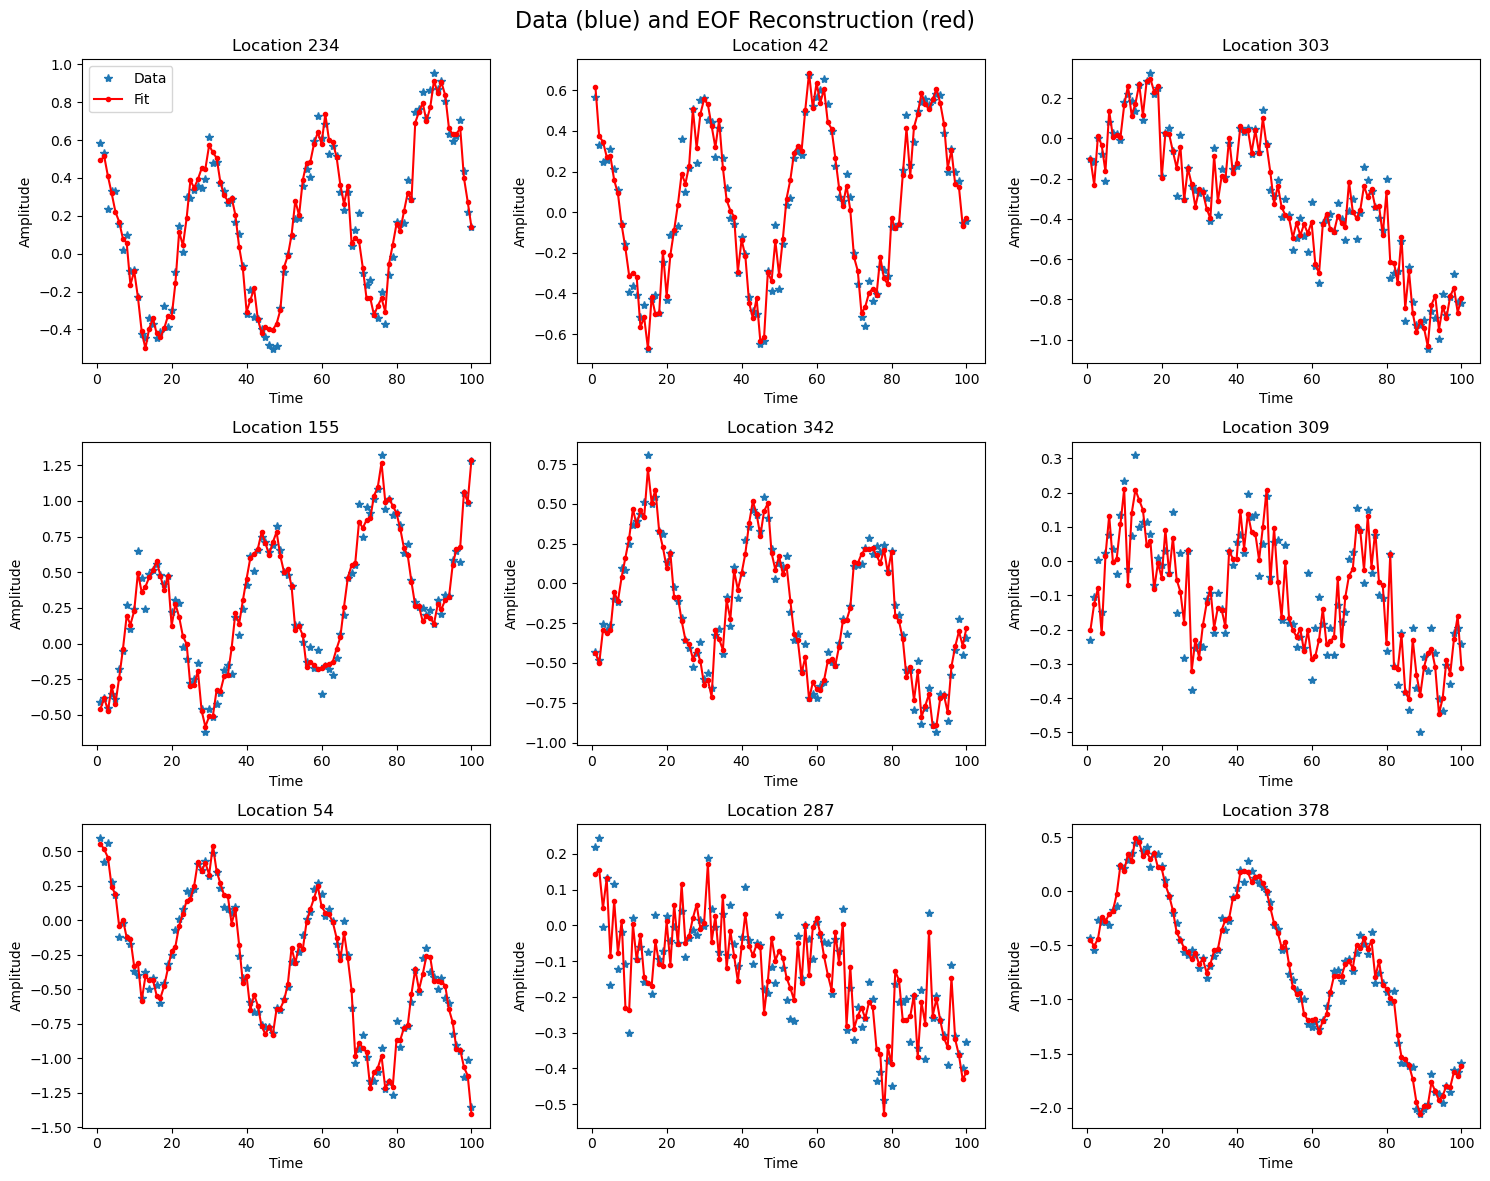

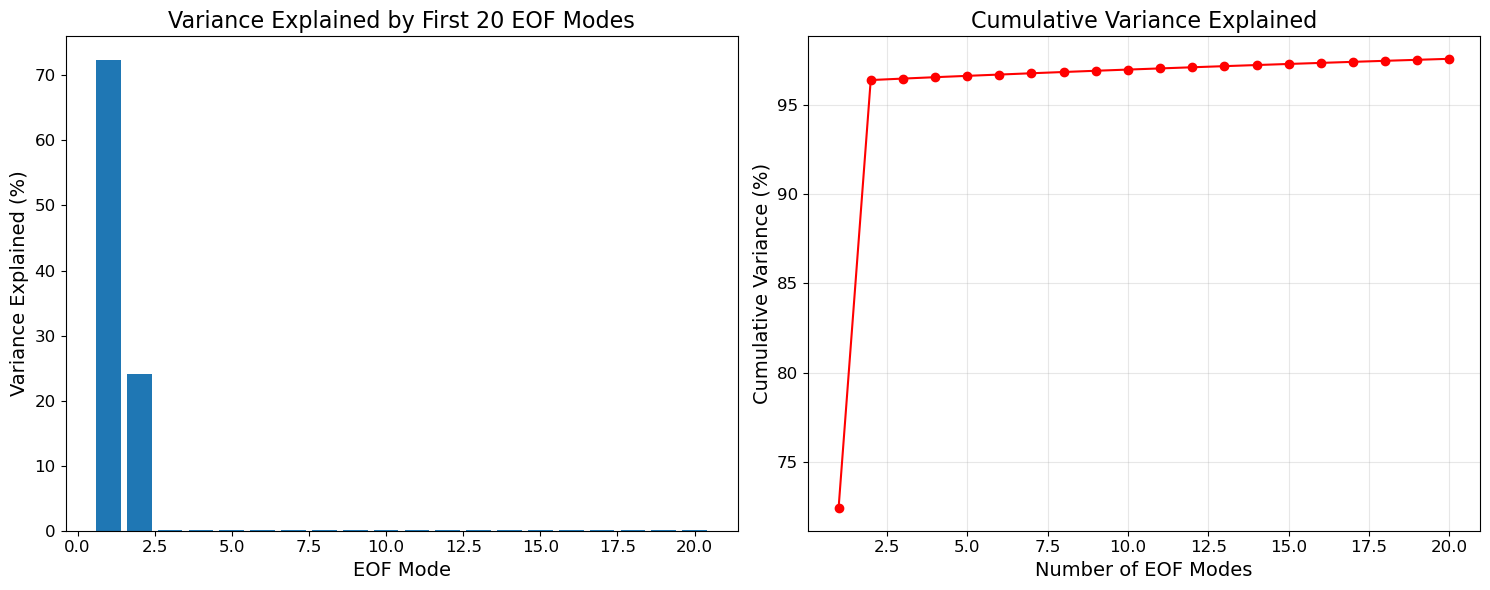

First 10 modes explain 97.0% of the variance
First 20 modes explain 97.6% of the variance
First 50 modes explain 98.9% of the variance


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic spatio-temporal data set on a regular grid
x = np.linspace(-200, 200, 20)
y = np.linspace(-200, 200, 20)
Xcoord, Ycoord = np.meshgrid(x, y)
Xcoord = Xcoord.flatten()
Ycoord = Ycoord.flatten()

# Regular time intervals
N = 100  # number of times
dt = 1   # time intervals
t = np.arange(dt, N*dt + dt, dt)

# Noise level (reduced from 0.5 to 0.1)
Noise = 0.1

################################
### Quadratic trend
# Sinusoidal spatial wavelengths (multiplied by 10)
L1x = 200 * 10
L1y = 300 * 10
L2x = 100 * 10
L2y = 100 * 10

# Make spatial pattern
D = (np.random.rand() * np.cos(2*np.pi*Xcoord/L1x) + 
     np.random.rand() * np.sin(2*np.pi*Xcoord/L2x))
D = (D + np.random.rand() * np.cos(2*np.pi*Ycoord/L1y) + 
     np.random.rand() * np.sin(2*np.pi*Ycoord/L2y))

ts = (t/np.max(t))**2
Dt = np.outer(ts, D)

t1 = ts
D1 = D
D1t = Dt

# Plot spatial and temporal patterns for quadratic trend
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

im1 = ax1.imshow(D1.reshape(20, 20), origin='lower')
ax1.set_title('Spatial pattern for quadratic trend', fontsize=20)
plt.colorbar(im1, ax=ax1)
ax1.tick_params(axis='both', which='major', labelsize=16)

im2 = ax2.imshow(D1t, aspect='auto', origin='lower', extent=[0, 400, t[0], t[-1]])
ax2.set_title('Spatial-temporal pattern for quadratic trend', fontsize=20)
ax2.set_xlabel('Cell number', fontsize=16)
ax2.set_ylabel('Time', fontsize=16)
plt.colorbar(im2, ax=ax2)
ax2.tick_params(axis='both', which='major', labelsize=16)

plt.tight_layout()
plt.show()

################################
### Periodic trend
# Sinusoidal spatial terms
L1x = 400
L1y = 600
L2x = 200
L2y = 200

D = (np.random.rand() * np.cos(2*np.pi*Xcoord/L1x) + 
     np.random.rand() * np.sin(2*np.pi*Xcoord/L2x))
D = (D + np.random.rand() * np.cos(2*np.pi*Ycoord/L1y) + 
     np.random.rand() * np.sin(2*np.pi*Ycoord/L2y))

T = 30  # period of harmonic oscillation
ts = np.random.rand() * np.cos(2*np.pi*t/T)
Dt = np.outer(ts, D)

t2 = ts
D2 = D
D2t = Dt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

im1 = ax1.imshow(D2.reshape(20, 20), origin='lower')
ax1.set_title('Spatial pattern for periodic trend', fontsize=20)
plt.colorbar(im1, ax=ax1)
ax1.tick_params(axis='both', which='major', labelsize=16)

im2 = ax2.imshow(D2t, aspect='auto', origin='lower', extent=[0, 400, t[0], t[-1]])
ax2.set_title('Spatial-temporal pattern for periodic trend', fontsize=20)
ax2.set_xlabel('Cell number', fontsize=16)
ax2.set_ylabel('Time', fontsize=16)
plt.colorbar(im2, ax=ax2)
ax2.tick_params(axis='both', which='major', labelsize=16)

plt.tight_layout()
plt.show()

################################
### Total signal
D = D1t + D2t
Dtrue = D.copy()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

im1 = ax1.imshow(D, aspect='auto', origin='lower', extent=[0, 400, t[0], t[-1]])
ax1.set_title('Spatial-temporal pattern for total signal', fontsize=20)
ax1.set_xlabel('Cell number', fontsize=16)
ax1.set_ylabel('Time', fontsize=16)
plt.colorbar(im1, ax=ax1)
ax1.tick_params(axis='both', which='major', labelsize=16)

# Add noise
D = D + Noise * np.random.randn(*D.shape)

im2 = ax2.imshow(D, aspect='auto', origin='lower', extent=[0, 400, t[0], t[-1]])
ax2.set_title('With noise added', fontsize=20)
ax2.set_xlabel('Cell number', fontsize=16)
ax2.set_ylabel('Time', fontsize=16)
plt.colorbar(im2, ax=ax2)
ax2.tick_params(axis='both', which='major', labelsize=16)

plt.tight_layout()
plt.show()

################################
# Plot some time series, randomly sampled
np.random.seed(123)  # Set seed for consistent sampling
indices = np.random.choice(D.shape[1], 9, replace=False)

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for k in range(9):
    axes[k].plot(t, Dtrue[:, indices[k]], '.', label='True', markersize=4)
    axes[k].plot(t, D[:, indices[k]], '.', label='With noise', markersize=4)
    axes[k].set_title(f'Location {indices[k]}', fontsize=12)
    axes[k].tick_params(axis='both', which='major', labelsize=10)
    if k == 0:
        axes[k].legend()

plt.tight_layout()
plt.show()

################################
# Compute SVD (EOF Analysis)
# Remove the time mean of each column (optional - commented out in MATLAB)
# D = D - np.mean(D, axis=0)

U, S, Vt = svd(D, full_matrices=False)
V = Vt.T  # Transpose to match MATLAB convention
EC = U @ np.diag(S)  # EOF time series (expansion coefficients)

# EOFs = V (spatial patterns)
# ECs = U*S (EOF time series/expansion coefficient time series)

# Visualize V matrix (EOFs - spatial basis functions)
plt.figure(figsize=(12, 8))
plt.imshow(V, aspect='auto')
plt.colorbar()
plt.title('V = EOFs, columns are spatial basis', fontsize=20)
plt.xlabel('EOF Mode', fontsize=16)
plt.ylabel('Spatial Location', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

# Visualize EC matrix (EOF time series)
plt.figure(figsize=(12, 8))
plt.imshow(EC.T, aspect='auto')  # Transpose for better visualization
plt.colorbar()
plt.title('U*S = EOF time series', fontsize=20)
plt.xlabel('Time', fontsize=16)
plt.ylabel('EOF Mode', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

# Plot first two EOFs (spatial basis) and associated EOF time series
# First EOF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

im1 = ax1.imshow(V[:, 0].reshape(20, 20), origin='lower')
ax1.set_title('V(:,1) = First spatial basis', fontsize=20)
ax1.set_aspect('equal')
plt.colorbar(im1, ax=ax1)
ax1.tick_params(axis='both', which='major', labelsize=14)

ax2.plot(t, EC[:, 0])
ax2.set_title('EC(:,1) = First EOF time series', fontsize=20)
ax2.set_xlabel('Time', fontsize=16)
ax2.set_ylabel('Amplitude', fontsize=16)
ax2.tick_params(axis='both', which='major', labelsize=14)

plt.tight_layout()
plt.show()

# Second EOF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

im1 = ax1.imshow(V[:, 1].reshape(20, 20), origin='lower')
ax1.set_title('V(:,2) = Second spatial basis', fontsize=20)
ax1.set_aspect('equal')
plt.colorbar(im1, ax=ax1)
ax1.tick_params(axis='both', which='major', labelsize=14)

ax2.plot(t, EC[:, 1])
ax2.set_title('EC(:,2) = Second EOF time series', fontsize=20)
ax2.set_xlabel('Time', fontsize=16)
ax2.set_ylabel('Amplitude', fontsize=16)
ax2.tick_params(axis='both', which='major', labelsize=14)

plt.tight_layout()
plt.show()


# Plot true time series
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1.plot(t,t1)
ax1.set_title('t1 = True first time series', fontsize=20)
ax1.set_xlabel('Time', fontsize=16)
ax1.set_ylabel('Amplitude', fontsize=16)
ax1.tick_params(axis='both', which='major', labelsize=14)

ax2.plot(t,t2)
ax2.set_title('t2 = True second time series', fontsize=20)
ax2.set_xlabel('Time', fontsize=16)
ax2.set_ylabel('Amplitude', fontsize=16)
ax2.tick_params(axis='both', which='major', labelsize=14)

 
################################
# Reconstruct data using first p spatial EOFs
p = 50
Sp = np.diag(S[:p])
Up = U[:, :p]
Vp = V[:, :p]
D_hat = Up @ Sp @ Vp.T



# Plot some time series, randomly sampled (same indices as before for comparison)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for k in range(9):
    axes[k].plot(t, D[:, indices[k]], '*', label='Data', markersize=6)
    axes[k].plot(t, D_hat[:, indices[k]], 'r-o', label='Fit', markersize=3)
    axes[k].set_title(f'Location {indices[k]}', fontsize=12)
    axes[k].set_xlabel('Time', fontsize=10)
    axes[k].set_ylabel('Amplitude', fontsize=10)
    axes[k].tick_params(axis='both', which='major', labelsize=10)
    if k == 0:
        axes[k].legend()

plt.suptitle('Data (blue) and EOF Reconstruction (red)', fontsize=16)
plt.tight_layout()
plt.show()

# Calculate and display variance explained by each mode
variance_explained = (S**2) / np.sum(S**2) * 100
cumulative_variance = np.cumsum(variance_explained)

plt.figure(figsize=(15, 6))

# Individual mode variance 
plt.subplot(1, 2, 1)
plt.bar(range(1, 21), variance_explained[:20])
plt.title('Variance Explained by First 20 EOF Modes', fontsize=16)
plt.xlabel('EOF Mode', fontsize=14)
plt.ylabel('Variance Explained (%)', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)

# Cumulative variance
plt.subplot(1, 2, 2)
plt.plot(range(1, 21), cumulative_variance[:20], 'ro-')
plt.title('Cumulative Variance Explained', fontsize=16)
plt.xlabel('Number of EOF Modes', fontsize=14)
plt.ylabel('Cumulative Variance (%)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()

print(f"First 10 modes explain {cumulative_variance[9]:.1f}% of the variance")
print(f"First 20 modes explain {cumulative_variance[19]:.1f}% of the variance")
print(f"First {p} modes explain {cumulative_variance[p-1]:.1f}% of the variance")

# A Kalman Filtering Tutorial (Summary)

**Based on:**  
Rhudy, M. B., Salguero, R. A., & Holappa, K. (2017).  
*A Kalman Filtering Tutorial for Undergraduate Students.*  
*International Journal of Computer Science & Engineering Survey, 8(1), 1–18.*  
DOI: 10.5121/ijcses.2017.8101

---

## Overview

This tutorial provides a practical introduction to **Kalman filtering** for undergraduate students with limited statistical background.  
Rather than emphasizing stochastic derivations, it focuses on **conceptual understanding** and **hands-on implementation** for dynamic systems estimation.

---

## 1. What Is a Kalman Filter?

A **Kalman Filter (KF)** is a recursive algorithm that estimates the **true state** of a system from **noisy measurements**.

It is also called **linear quadratic estimation (LQE)**.

Analogy:
- A coffee filter separates grounds from water.  
- A low-pass filter passes low frequencies and attenuates high ones.  
- A Kalman filter lets *useful signal information* through while filtering noise.

Goal: combine **system dynamics** and **sensor data** to reduce uncertainty.

---

## 2. System Model

The KF works on **linear discrete-time state-space models**:

$$
x_k = F_{k-1} x_{k-1} + G_{k-1} u_{k-1} + w_{k-1}
$$

$$
y_k = H_k x_k + v_k
$$

**Where:**

| Symbol | Meaning | Dimension |
|---------|----------|------------|
| **x** | State vector (quantities to estimate) | n×1 |
| **y** | Measurement vector | m×1 |
| **u** | Input/control vector | p×1 |
| **F** | State transition matrix | n×n |
| **G** | Input matrix | n×p |
| **H** | Observation matrix | m×n |
| **w**, **v** | Process & measurement noise (zero-mean) | – |
| **Q**, **R** | Process & measurement noise covariance matrices | n×n, m×m |

---

## 3. Kalman Filter Algorithm

The algorithm runs in two stages: **Prediction** and **Correction (Update)**.

### Prediction

$$
\hat{x}_{k|k-1} = F_{k-1}\hat{x}_{k-1} + G_{k-1}u_{k-1}
$$

$$
P_{k|k-1} = F_{k-1}P_{k-1}F_{k-1}^T + Q
$$

### Correction

Compute the **Kalman gain**:

$$
K_k = P_{k|k-1} H_k^T (H_k P_{k|k-1} H_k^T + R)^{-1}
$$

Update the state estimate:

$$
\hat{x}_k = \hat{x}_{k|k-1} + K_k (y_k - H_k \hat{x}_{k|k-1})
$$

Update the covariance:

$$
P_k = (I - K_k H_k) P_{k|k-1}
$$

---

## 4. Tuning the Covariances (Q, R, P₀)

- **Q (process noise):** Larger Q → trust the model less → rely more on measurements.  
- **R (measurement noise):** Larger R → trust the measurements less → rely more on the model.  
- **P₀ (initial covariance):** Controls how fast the filter converges at start; often identity.

---

## 5. The Observation Matrix H

The **H matrix** maps system states to measurable outputs.

Example — if only the 1st, 2nd, and 5th states are measured:

$$
H =
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 \\\\
0 & 1 & 0 & 0 & 0 \\\\
0 & 0 & 0 & 0 & 1
\end{bmatrix}
$$

H can also:
- Apply **scaling** (e.g., radius → diameter)  
- Combine states (e.g., perimeter = sum of triangle sides)

---

## 6. Example: Free-Fall Estimation

### Goal
Estimate an object’s position in free-fall from noisy range measurements.

### State Definition

$$
x_k =
\begin{bmatrix}
h_k \\\\
\dot{h}_k
\end{bmatrix}
$$

### System Matrices

$$
F =
\begin{bmatrix}
1 & \Delta t \\\\
0 & 1
\end{bmatrix},
\quad
G =
\begin{bmatrix}
-\tfrac{1}{2}\Delta t^2 \\\\
-\Delta t
\end{bmatrix},
\quad
u = g
$$

Observation model:

$$
H = [1\ 0], \quad R = 4
$$

Initial estimates:

$$
\hat{x}_0 =
\begin{bmatrix}
105 \\\\
0
\end{bmatrix},
\quad
P_0 =
\begin{bmatrix}
10 & 0 \\\\
0 & 0.01
\end{bmatrix}
$$

**Result:**  
The filter converges rapidly to the true trajectory, smoothing out the measurement noise.

---

## 7. The Extended Kalman Filter (EKF)

For **nonlinear systems**:

$$
x_k = f(x_{k-1}, u_{k-1}) + w_{k-1}
$$

$$
y_k = h(x_k) + v_k
$$

Linearize at each step using **Jacobians**:

$$
F_k = \frac{\partial f}{\partial x}, \quad
H_k = \frac{\partial h}{\partial x}
$$

Then apply the same predict–update equations, replacing \( F, H \) with \( F_k, H_k \).

---

## 8. Unscented Kalman Filter (UKF)

Alternative to EKF that avoids Jacobians.  
It uses the **unscented transform** to propagate means and covariances through nonlinear functions.  
- More accurate for highly nonlinear problems.  
- More computationally expensive.

---

## 9. Covariance Matrices Explained

- **Variance (σ²):** spread of a single random variable.  
- **Covariance matrix:** describes how uncertainties in different variables are related.

Diagonal elements → individual variances.  
Off-diagonals → correlations between variables.  
In 2D, confidence regions are ellipses (uncorrelated → axis-aligned).

---

## 10. Key Takeaways

- Kalman filtering is a **recursive, optimal linear estimator** under Gaussian noise.  
- It balances model prediction and measurement correction via Q and R.  
- The EKF and UKF extend it to **nonlinear** systems.  
- Correct tuning and modeling are crucial for good results.

---

**Reference:**  
Rhudy M. B., Salguero R. A., & Holappa K. (2017).  
*A Kalman Filtering Tutorial for Undergraduate Students.*  
*IJCSES, 8(1)*, 1–18. DOI 10.5121/ijcses.2017.8101


# Kalman Filter for Projectile Motion

This section implements a Kalman filter for tracking projectile motion, ported from MATLAB to Python. The filter estimates the position and velocity of a falling object under gravity, with optional process noise to model additional random effects.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 1000  # number of time steps
dt = 0.001  # Sampling time (s)
t = dt * np.arange(1, N+1)  # time vector (s)

include_process_noise = True
generate_new_data = True
include_random_walk_noise = True

if include_process_noise:
    # with process noise
    F = np.array([[1, dt, 0], 
                  [0, 1, 0],
                  [0, 0, 1]])  # system matrix - state
    G = np.array([[-0.5*dt**2], 
                  [-dt], 
                  [0]])  # system matrix - input
    H = np.array([1, 0, 1]).reshape(1, -1)  # observation matrix
    tau = 10
    Q = np.array([[0, 0, 0], 
                  [0, 0, 0],
                  [0, 0, tau**2*dt]])  # process noise covariance
    u = 9.80665  # input = acceleration due to gravity (m/s^2)
    I = np.eye(3)  # identity matrix
    
    # Initialize the state vector (true state)
    y0 = 100  # m - initial position
    v0 = 0    # m/s - initial velocity
    xt = np.zeros((3, N))  # True state vector
    xt[:, 0] = [y0, v0, 0]  # True initial state
    
else:
    # without process noise
    F = np.array([[1, dt], 
                  [0, 1]])  # system matrix - state
    G = np.array([[-0.5*dt**2], 
                  [-dt]])  # system matrix - input
    H = np.array([1, 0]).reshape(1, -1)  # observation matrix
    Q = np.array([[0, 0], 
                  [0, 0]])  # process noise covariance
    u = 9.80665  # input = acceleration due to gravity (m/s^2)
    I = np.eye(2)  # identity matrix
    
    # Initialize the state vector (true state)
    y0 = 100  # m - initial position
    v0 = 0    # m/s - initial velocity
    xt = np.zeros((2, N))  # True state vector
    xt[:, 0] = [y0, v0]  # True initial state

# Generate synthetic data by propagating true states
for k in range(1, N):
    # Propagate the states through the prediction equations
    xt[:, k] = F @ xt[:, k-1] + G.flatten() * u

if generate_new_data:
    # Generate the noisy measurement from the true state
    R = 0.2  # m^2/s^2 - measurement noise variance
    v_noise = np.sqrt(R) * np.random.randn(N)  # measurement noise
    z = (H @ xt).flatten() + v_noise  # noisy measurement
    
    if include_random_walk_noise:
        # add integrated random walk
        Riw = 0.002
        v_iw = np.cumsum(np.sqrt(Riw) * np.random.randn(N))  # integrated white noise (Brownian motion)
        z = z + v_iw

print("Generated synthetic projectile motion data with measurements")
print(f"Time span: {t[0]:.3f} to {t[-1]:.3f} seconds")
print(f"Initial position: {y0} m, Initial velocity: {v0} m/s")

Generated synthetic projectile motion data with measurements
Time span: 0.001 to 1.000 seconds
Initial position: 100 m, Initial velocity: 0 m/s


In [5]:
# Perform the Kalman filter estimation
if include_process_noise:
    # with process noise
    x = np.zeros((3, N))  # Estimated state vector
    x[:, 0] = [105, -0.02, 0]  # Guess for initial state
    P = np.array([[10, 0, 0], 
                  [0, 0.01, 0],
                  [0, 0, 0]])  # Covariance for initial state error
else:
    # without process noise
    x = np.zeros((2, N))  # Estimated state vector
    x[:, 0] = [105, -0.02]  # Guess for initial state
    P = np.array([[10, 0], 
                  [0, 0.01]])  # Covariance for initial state error

# Loop through and perform the Kalman filter equations recursively
for k in range(1, N):
    # Predict the state vector
    x[:, k] = F @ x[:, k-1] + G.flatten() * u
    
    # Predict the covariance
    P = F @ P @ F.T + Q
    
    # Calculate the Kalman gain matrix
    K = P @ H.T @ np.linalg.inv(H @ P @ H.T + R)
    
    # Update the state vector
    x[:, k] = x[:, k] + K.flatten() * (z[k] - (H @ x[:, k]).item())
    
    # Update the covariance
    P = (I - np.outer(K.flatten(), H)) @ P

print("Kalman filter estimation completed")
print(f"Final estimated position: {x[0, -1]:.3f} m")
print(f"Final estimated velocity: {x[1, -1]:.3f} m/s")
if include_process_noise:
    print(f"Final process noise estimate: {x[2, -1]:.6f}")

Kalman filter estimation completed
Final estimated position: 95.272 m
Final estimated velocity: -9.817 m/s
Final process noise estimate: 1.129214


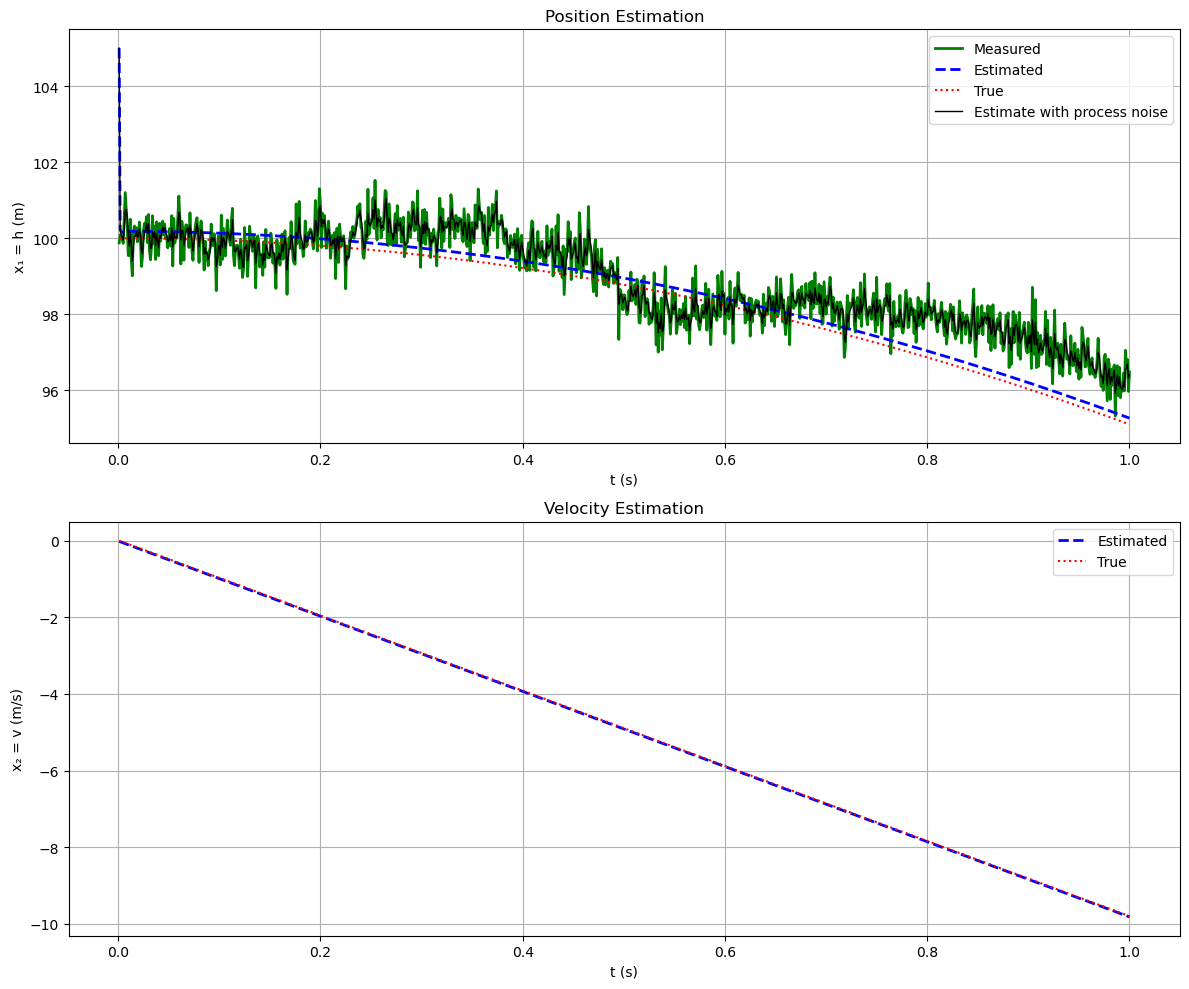

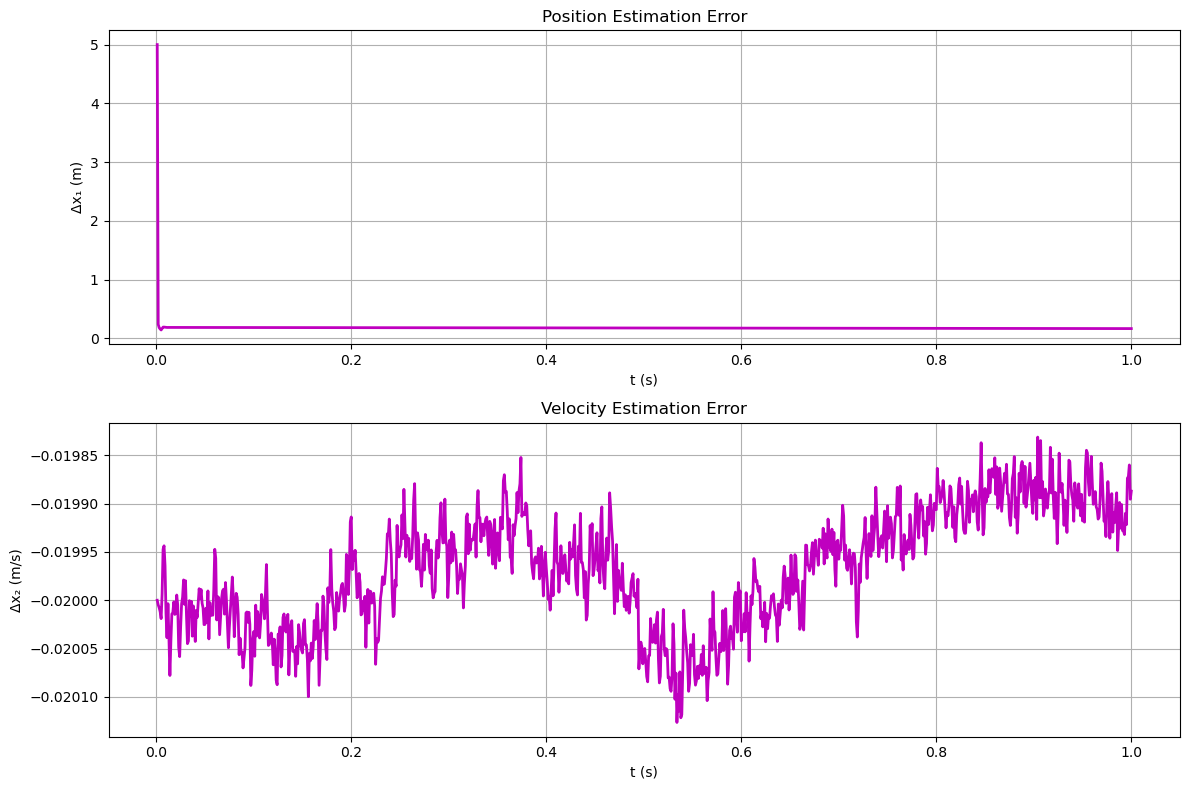


Estimation Performance:
Position RMSE: 0.2361 m
Velocity RMSE: 0.019967 m/s
Final position error: 0.1655 m
Final velocity error: -0.019887 m/s


In [6]:
# Plot the results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot the states
ax1.plot(t, z, 'g-', linewidth=2, label='Measured')
ax1.plot(t, x[0, :], 'b--', linewidth=2, label='Estimated')
ax1.plot(t, xt[0, :], 'r:', linewidth=1.5, label='True')

if include_process_noise:
    # including process noise contribution
    ax1.plot(t, x[0, :] + x[2, :], 'k-', linewidth=1, label='Estimate with process noise')

ax1.set_xlabel('t (s)')
ax1.set_ylabel('x₁ = h (m)')
ax1.grid(True)
ax1.legend()
ax1.set_title('Position Estimation')

# Plot velocity
ax2.plot(t, x[1, :], 'b--', linewidth=2, label='Estimated')
ax2.plot(t, xt[1, :], 'r:', linewidth=1.5, label='True')
ax2.set_xlabel('t (s)')
ax2.set_ylabel('x₂ = v (m/s)')
ax2.grid(True)
ax2.legend()
ax2.set_title('Velocity Estimation')

plt.tight_layout()
plt.show()

# Plot the estimation errors
fig2, (ax3, ax4) = plt.subplots(2, 1, figsize=(12, 8))

ax3.plot(t, x[0, :] - xt[0, :], 'm', linewidth=2)
ax3.set_xlabel('t (s)')
ax3.set_ylabel('Δx₁ (m)')
ax3.grid(True)
ax3.set_title('Position Estimation Error')

ax4.plot(t, x[1, :] - xt[1, :], 'm', linewidth=2)
ax4.set_xlabel('t (s)')
ax4.set_ylabel('Δx₂ (m/s)')
ax4.grid(True)
ax4.set_title('Velocity Estimation Error')

plt.tight_layout()
plt.show()

# Calculate and display some statistics
pos_rmse = np.sqrt(np.mean((x[0, :] - xt[0, :])**2))
vel_rmse = np.sqrt(np.mean((x[1, :] - xt[1, :])**2))

print(f"\nEstimation Performance:")
print(f"Position RMSE: {pos_rmse:.4f} m")
print(f"Velocity RMSE: {vel_rmse:.6f} m/s")
print(f"Final position error: {x[0, -1] - xt[0, -1]:.4f} m")
print(f"Final velocity error: {x[1, -1] - xt[1, -1]:.6f} m/s")